# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>BATIKAN BORA ORMANCI</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# Read csv
dia_csv_path = "diamonds.csv"
df = pd.read_csv(dia_csv_path)
df.head(20)

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,Very Low
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,Very Low
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,Very Low
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,Very Low


In [4]:
df.tail()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,Very Low


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.describe()

# Diamond Cut Clarity Color and Carat

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [7]:
df.dtypes

index        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price       object
dtype: object

In [8]:
df.shape

(53940, 11)

In [6]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [7]:
# remove index before exploratory phase
#

#nvm, I'll just keep em, it may make sense to do so irl as well

#nvm, I'll drop it.. But it would've been nice to keep it in some cases cuz maybe there is some correlation of things with the dates they are added to the db

df = df.drop(['index'], axis = 1)

In [8]:
df.duplicated().sum() # oof, we have many of those

342

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum() # bb

0

# Exploratory Data Analysis

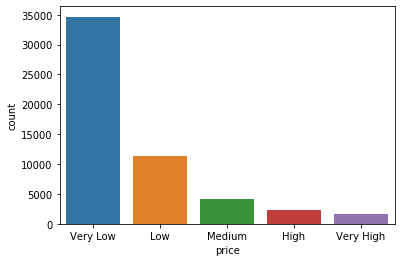

In [3]:
# Our label Distribution (countplot)


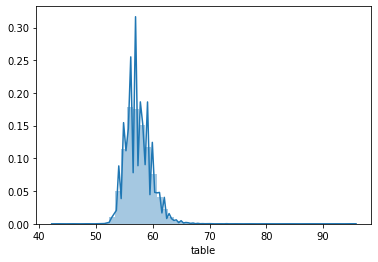

In [4]:
# Example EDA (distplot)


<AxesSubplot:xlabel='price', ylabel='count'>

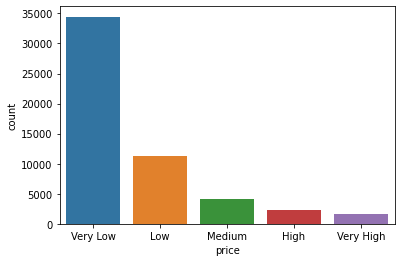

In [11]:
sns.countplot(x="price", data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

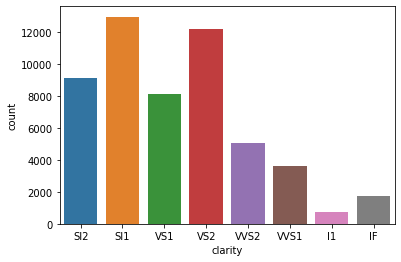

In [15]:
sns.countplot(x="clarity", data=df)

In [12]:
sns.pairplot(df)
# I've plotted it once and viewed it, but I don't want to plot it ever again cuz it takes far too long. Assume it is plotted somewhere around here please :)

/home/inductiomori/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

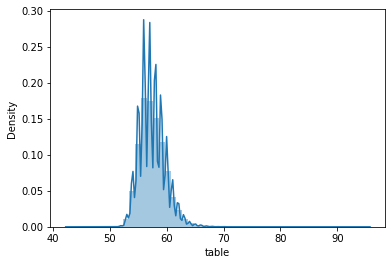

In [12]:
sns.distplot(df["table"])

/home/inductiomori/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

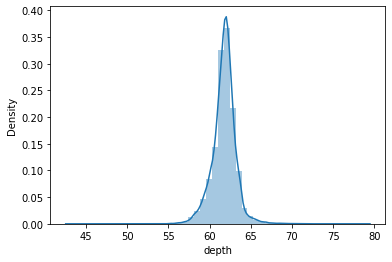

In [18]:
sns.distplot(df["depth"])

/home/inductiomori/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

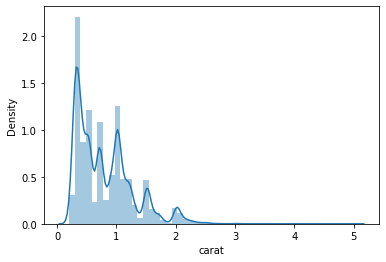

In [19]:
sns.distplot(df["carat"])

carat leans kinda too far left

In [15]:
df.corr('pearson').sum() # to see which ones correlate the most iwth others

carat    4.089789
depth    0.772665
table    1.410881
x        4.090077
y        4.031931
z        4.120904
dtype: float64

In [21]:
df.corr('pearson') > 0.86 # to find the said correlating pairs

,carat,depth,table,x,y,z
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
x,True,False,False,True,True,True
y,True,False,False,True,True,True
z,True,False,False,True,True,True


x,y,z are too correlated in general and with each other

In [22]:
df.corr('pearson')

,carat,depth,table,x,y,z
carat,1.000000,0.028400,0.180795,0.975362,0.951795,0.953437
depth,0.028400,1.000000,-0.297230,-0.024843,-0.028921,0.095258
table,0.180795,-0.297230,1.000000,0.194475,0.182893,0.149947
x,0.975362,-0.024843,0.194475,1.000000,0.974491,0.970590
y,0.951795,-0.028921,0.182893,0.974491,1.000000,0.951672
z,0.953437,0.095258,0.149947,0.970590,0.951672,1.000000


In [14]:
PCA?

In [13]:
# principial component analysis
pri_comp = PCA(n_components=1, random_state=99) #



xyz = pd.DataFrame(pri_comp.fit_transform(df.iloc[:,7:9]))
print(xyz)


df['xyz'] = xyz
df.corr('pearson')

              0
0     -2.074516
1     -2.256394
2     -2.059519
3     -1.757120
4     -1.592361
...         ...
53593  0.002328
53594  0.050638
53595 -0.035131
53596  0.434563
53597  0.168866

[53598 rows x 1 columns]


,carat,depth,table,x,y,z,xyz
carat,1.000000,0.028400,0.180795,0.975362,0.951795,0.953437,0.659860
depth,0.028400,1.000000,-0.297230,-0.024843,-0.028921,0.095258,0.004412
table,0.180795,-0.297230,1.000000,0.194475,0.182893,0.149947,0.122364
x,0.975362,-0.024843,0.194475,1.000000,0.974491,0.970590,0.668040
y,0.951795,-0.028921,0.182893,0.974491,1.000000,0.951672,0.654031
z,0.953437,0.095258,0.149947,0.970590,0.951672,1.000000,0.652325
xyz,0.659860,0.004412,0.122364,0.668040,0.654031,0.652325,1.000000


In [14]:
dfb = df.drop(['x','y','z'], axis=1)

dfb.tail(5)

,carat,cut,color,clarity,depth,table,price,xyz
53935,0.72,Ideal,D,SI1,60.8,57.0,Very Low,NaN
53936,0.72,Good,D,SI1,63.1,55.0,Very Low,NaN
53937,0.70,Very Good,D,SI1,62.8,60.0,Very Low,NaN
53938,0.86,Premium,H,SI2,61.0,58.0,Very Low,NaN
53939,0.75,Ideal,D,SI2,62.2,55.0,Very Low,NaN


In [15]:


label_encoder = LabelEncoder()

dfb["cut"] = label_encoder.fit_transform(dfb["cut"]) 

dfb["price"] = label_encoder.fit_transform(dfb["price"]) 

dfb["clarity"] = label_encoder.fit_transform(dfb["clarity"]) 

dfb["color"] = label_encoder.fit_transform(dfb["color"]) 

dfb = pd.get_dummies(dfb, columns = ['cut'])

dfb = pd.get_dummies(dfb, columns = ['clarity'])

dfb = pd.get_dummies(dfb, columns = ['color']) # dumym variable

dfb.tail()

,carat,depth,table,price,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,...,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
53935,0.72,60.8,57.0,4,NaN,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
53936,0.72,63.1,55.0,4,NaN,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53937,0.70,62.8,60.0,4,NaN,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53938,0.86,61.0,58.0,4,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53939,0.75,62.2,55.0,4,NaN,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:

dfb['carat'] = minmax_scale(df['carat'])

In [16]:
dfb.isna().sum()

carat          0
depth          0
table          0
price          0
xyz          342
cut_0          0
cut_1          0
cut_2          0
cut_3          0
cut_4          0
clarity_0      0
clarity_1      0
clarity_2      0
clarity_3      0
clarity_4      0
clarity_5      0
clarity_6      0
clarity_7      0
color_0        0
color_1        0
color_2        0
color_3        0
color_4        0
color_5        0
color_6        0
dtype: int64

In [17]:
dfb = dfb.dropna()

In [18]:
X, y = dfb.loc[:, dfb.columns != 'price'], dfb['price'] #locviloc

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
X_train.head()

,carat,depth,table,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,...,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
3450,0.90,63.2,59.0,0.093267,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7525,1.01,58.8,58.0,0.803660,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17296,1.08,61.8,55.0,-1.602701,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
53488,0.53,61.3,57.0,0.079537,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
38214,0.43,62.6,58.0,-1.010878,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
X_train.describe()

,carat,depth,table,xyz,cut_0,cut_1,cut_2,cut_3,cut_4,clarity_0,...,clarity_5,clarity_6,clarity_7,color_0,color_1,color_2,color_3,color_4,color_5,color_6
count,37518.000000,37518.000000,37518.000000,37278.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,...,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000,37518.000000
mean,0.124314,61.751453,57.457871,0.000298,0.029506,0.090437,0.399275,0.256597,0.224186,0.013780,...,0.228557,0.067328,0.094062,0.125140,0.181380,0.177568,0.210006,0.154486,0.100432,0.050989
std,0.098855,1.431018,2.232214,1.331193,0.169222,0.286810,0.489756,0.436761,0.417051,0.116578,...,0.419909,0.250592,0.291918,0.330882,0.385338,0.382154,0.407318,0.361419,0.300579,0.219978
min,0.000000,43.000000,43.000000,-6.737648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,61.000000,56.000000,-1.182587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103950,61.800000,57.000000,-0.026571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174636,62.500000,59.000000,0.927058,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,79.000000,95.000000,47.846764,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
y_train.head()

3450     4
7525     1
17296    1
53488    4
38214    4
Name: price, dtype: int64

In [22]:
X_train.isna().sum()

carat        0
depth        0
table        0
xyz          0
cut_0        0
cut_1        0
cut_2        0
cut_3        0
cut_4        0
clarity_0    0
clarity_1    0
clarity_2    0
clarity_3    0
clarity_4    0
clarity_5    0
clarity_6    0
clarity_7    0
color_0      0
color_1      0
color_2      0
color_3      0
color_4      0
color_5      0
color_6      0
dtype: int64

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       654
           1       0.86      0.87      0.87      3324
           2       0.75      0.75      0.75      1194
           3       0.73      0.71      0.72       482
           4       0.97      0.97      0.97     10323

    accuracy                           0.91     15977
   macro avg       0.79      0.79      0.79     15977
weighted avg       0.91      0.91      0.91     15977

max depth = 31
f1 Score = 0.7878090422175321


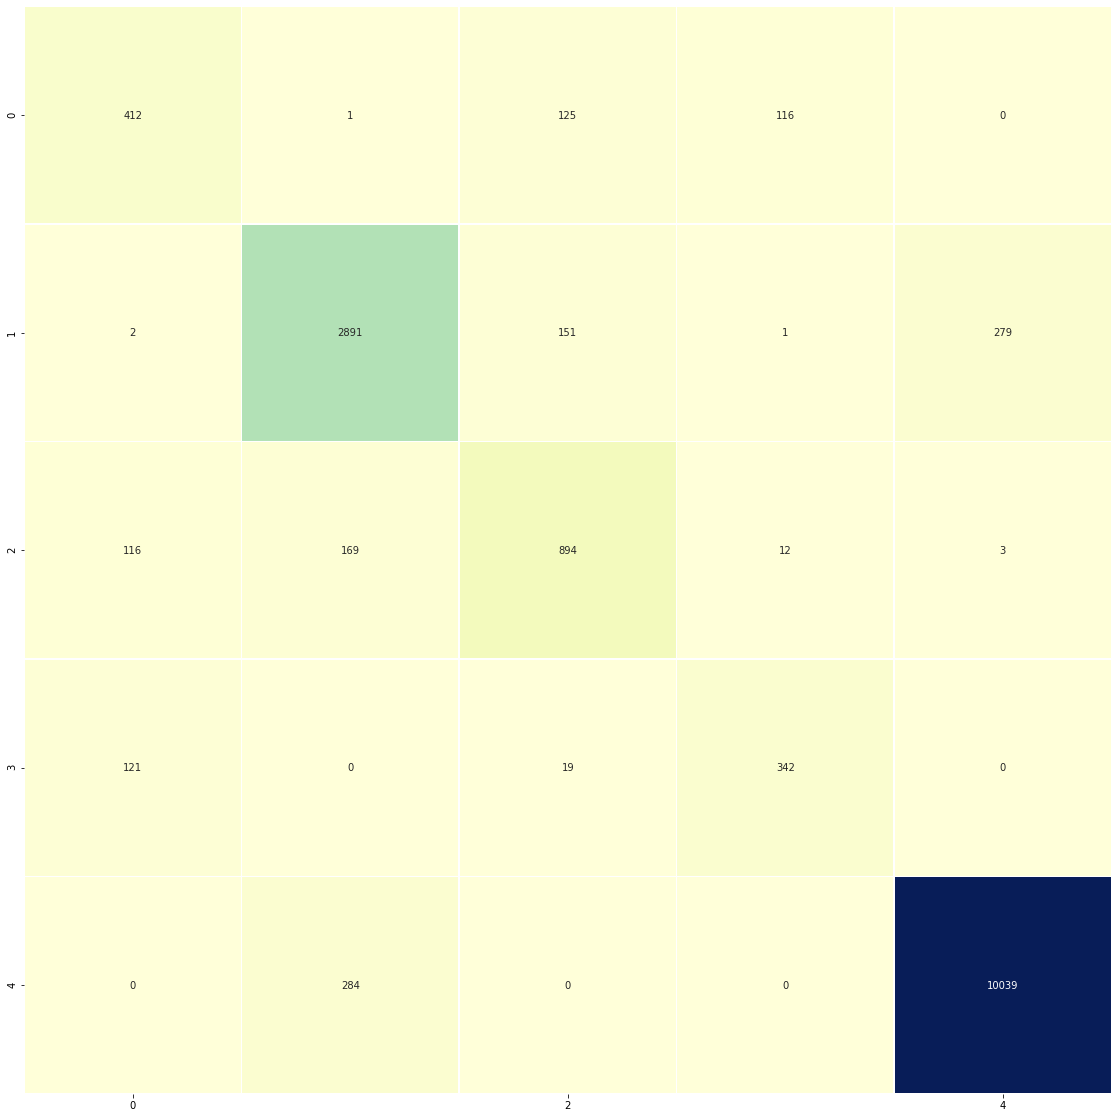

In [41]:
MOD1 = DecisionTreeClassifier(max_depth=None, criterion='gini', class_weight=None, random_state=42)


MOD1.fit(X_train,y_train)

PRED1 = MOD1.predict(X_test)
print(classification_report(y_test,PRED1))

CONF_MAT1 = confusion_matrix(y_test, PRED1)
plt.figure(figsize=(32, 20))
ax = sns.heatmap(CONF_MAT1, annot=True, cbar=False, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=2, square=True)

print("max depth = {}".format(MOD1.tree_.max_depth))
print("f1 Score = {}".format(f1_score(y_test, PRED1,average='macro')))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62       654
           1       0.86      0.87      0.86      3324
           2       0.75      0.74      0.75      1194
           3       0.73      0.70      0.72       482
           4       0.97      0.97      0.97     10323

    accuracy                           0.91     15977
   macro avg       0.79      0.78      0.78     15977
weighted avg       0.91      0.91      0.91     15977

max depth = 37
f1 Score = 0.7878090422175321


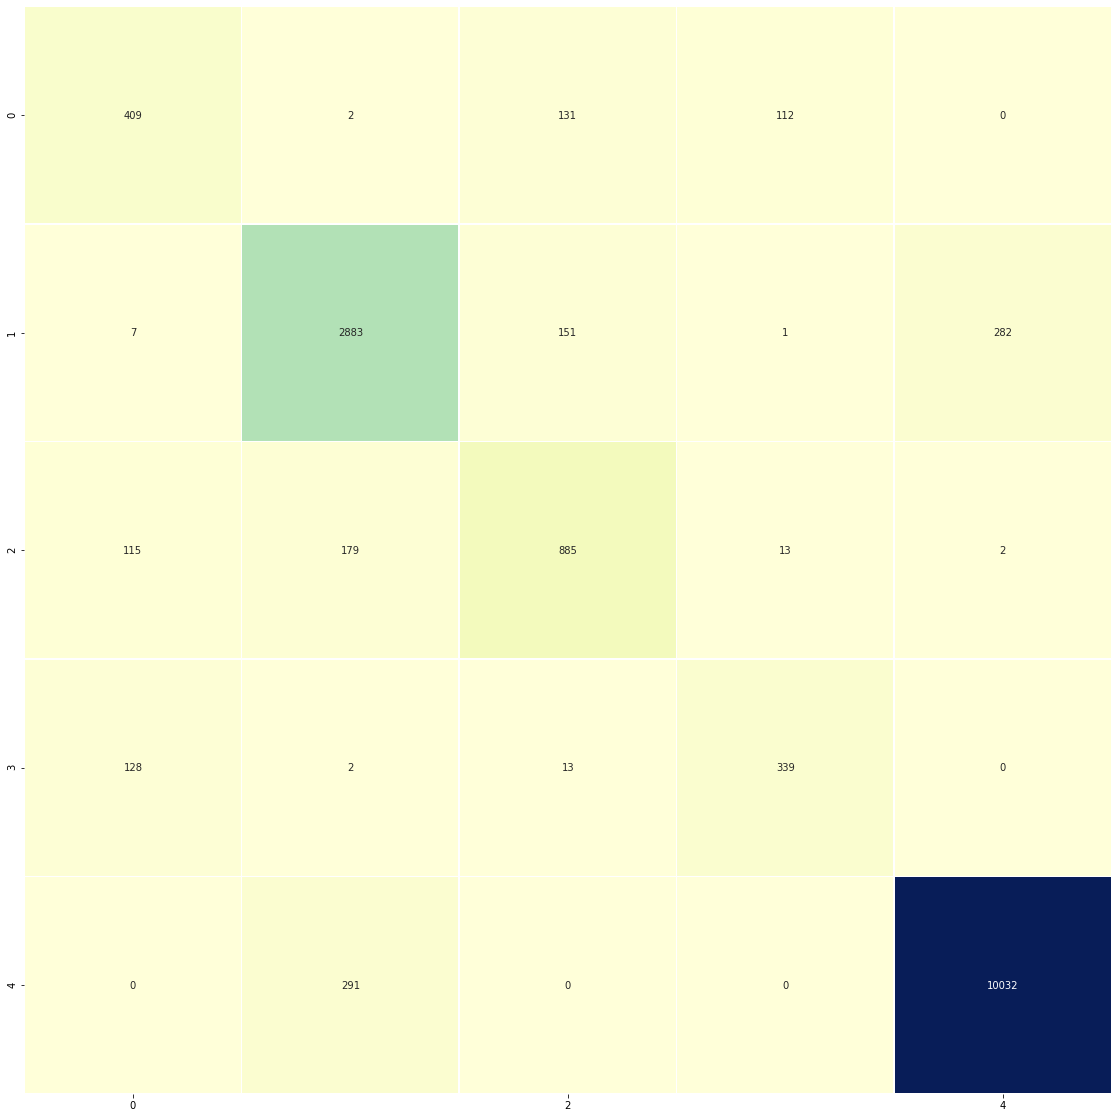

In [40]:
MOD2 = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42) # def: gini


MOD2.fit(X_train,y_train)

PRED2 = MOD2.predict(X_test)
print(classification_report(y_test,PRED2))

CONF_MAT2 = confusion_matrix(y_test, PRED2)
plt.figure(figsize=(32, 20))
ax = sns.heatmap(CONF_MAT2, annot=True, cbar=False, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=2, square=True)

print("max depth = {}".format(MOD2.tree_.max_depth))
print("f1 Score = {}".format(f1_score(y_test, PRED1,average='macro')))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       654
           1       0.87      0.87      0.87      3324
           2       0.76      0.76      0.76      1194
           3       0.74      0.70      0.72       482
           4       0.97      0.97      0.97     10323

    accuracy                           0.91     15977
   macro avg       0.79      0.79      0.79     15977
weighted avg       0.91      0.91      0.91     15977

max depth = 29
f1 Score = 0.7906881952298231


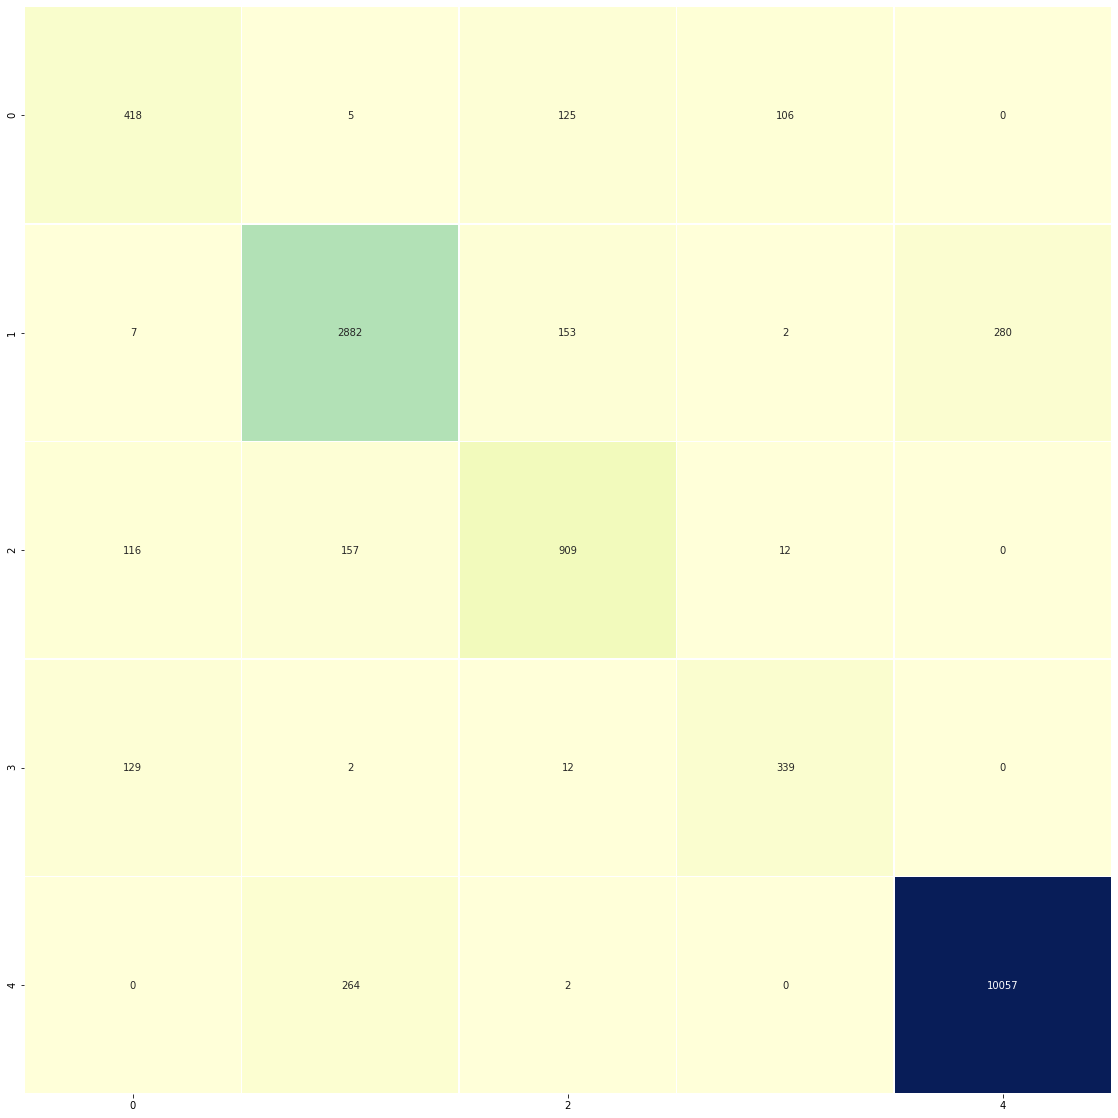

In [37]:
MOD3 = DecisionTreeClassifier(max_depth=None, criterion='entropy', class_weight='balanced', random_state=42)


MOD3.fit(X_train,y_train)

PRED3 = MOD3.predict(X_test)
print(classification_report(y_test,PRED3))

CONF_MAT3 = confusion_matrix(y_test, PRED3)
plt.figure(figsize=(32, 20))
ax = sns.heatmap(CONF_MAT3, annot=True, cbar=False, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=2, square=True)
print("max depth = {}".format(MOD3.tree_.max_depth))
print("f1 Score = {}".format(f1_score(y_test, PRED3,average='macro')))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       654
           1       0.86      0.87      0.86      3324
           2       0.75      0.74      0.75      1194
           3       0.72      0.71      0.72       482
           4       0.97      0.97      0.97     10323

    accuracy                           0.91     15977
   macro avg       0.79      0.79      0.79     15977
weighted avg       0.91      0.91      0.91     15977

max depth = 36
f1 Score = 0.7869990260813139


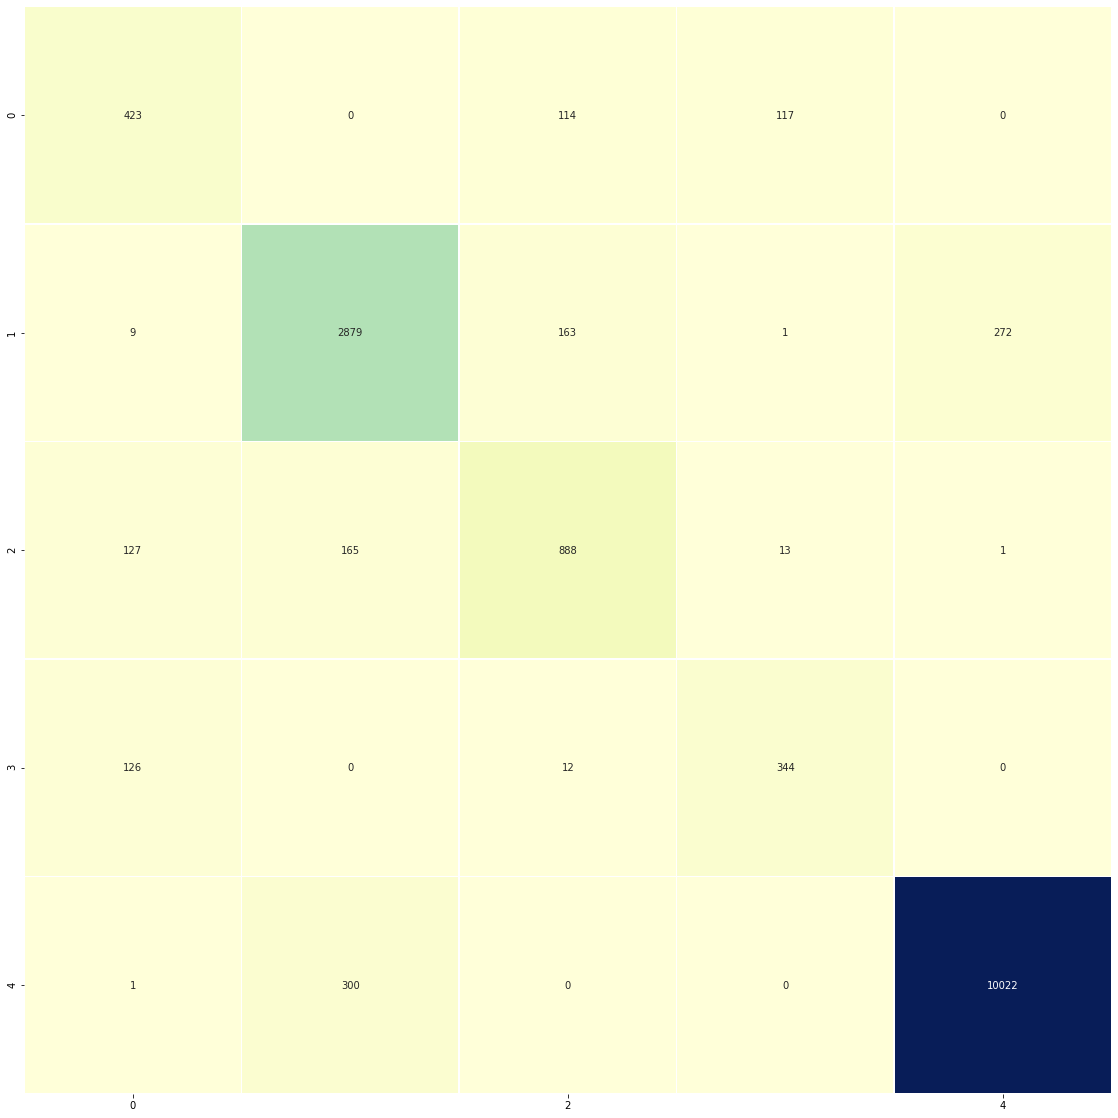

In [35]:
MOD4 = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42, min_samples_split=3)


MOD4.fit(X_train,y_train)

PRED4 = MOD4.predict(X_test)
print(classification_report(y_test,PRED4))

CONF_MAT4 = confusion_matrix(y_test, PRED4)
plt.figure(figsize=(32, 20))
ax = sns.heatmap(CONF_MAT4, annot=True, cbar=False, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=2, square=True)

print("max depth = {}".format(MOD4.tree_.max_depth))
print("f1 Score = {}".format(f1_score(y_test, PRED4,average='macro')))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       654
           1       0.86      0.87      0.87      3324
           2       0.76      0.75      0.75      1194
           3       0.73      0.73      0.73       482
           4       0.98      0.97      0.97     10323

    accuracy                           0.91     15977
   macro avg       0.79      0.79      0.79     15977
weighted avg       0.91      0.91      0.91     15977

max depth = 36
f1 Score = 0.7908849449049175


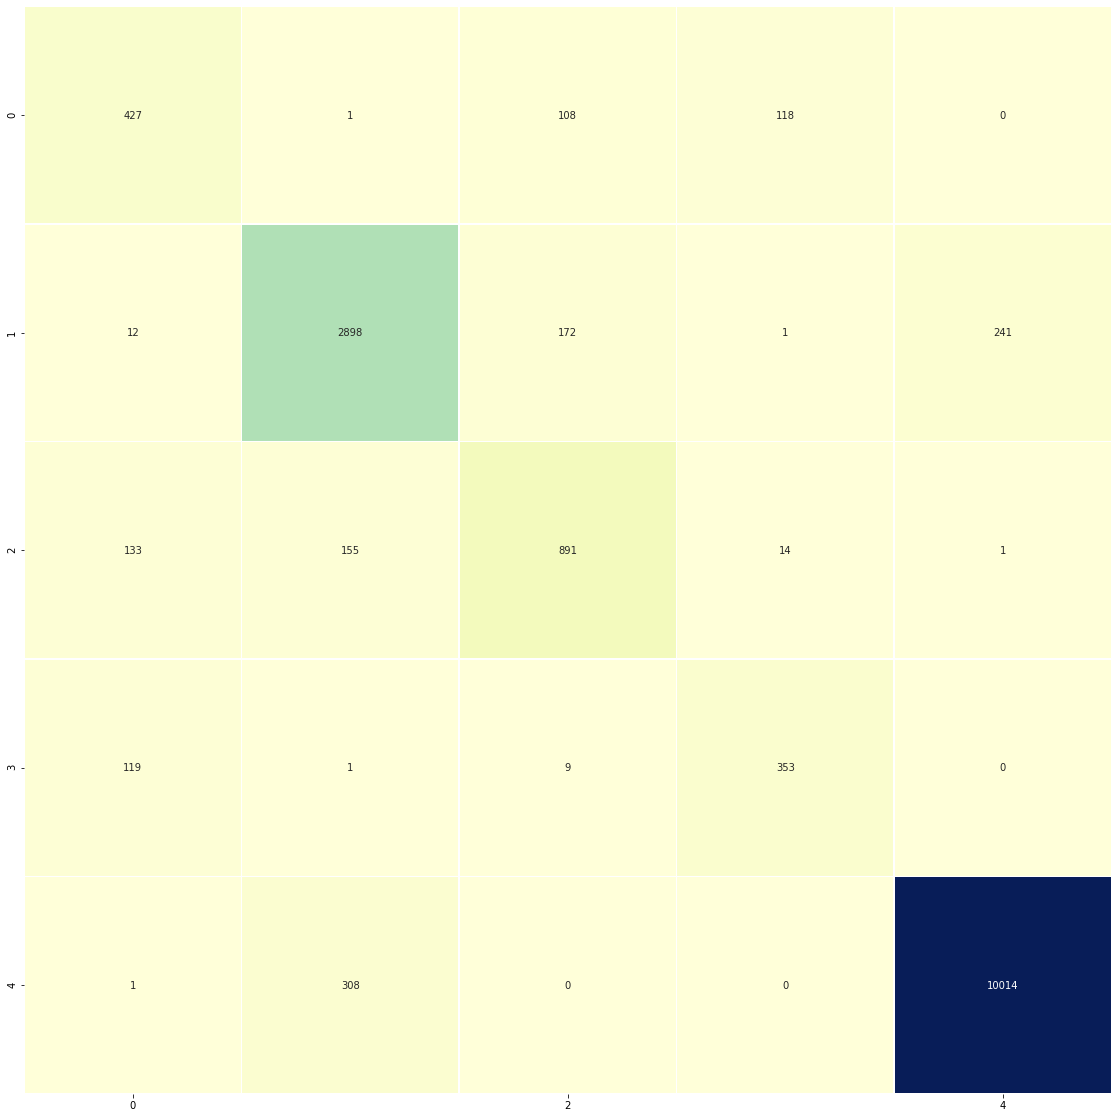

In [31]:
MOD5 = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42, min_samples_split=4)


MOD5.fit(X_train,y_train)

PRED5 = MOD5.predict(X_test)
print(classification_report(y_test,PRED5))

CONF_MAT5 = confusion_matrix(y_test, PRED5)
plt.figure(figsize=(32, 20))
ax = sns.heatmap(CONF_MAT5, annot=True, cbar=False, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=2, square=True)

print("max depth = {}".format(MOD5.tree_.max_depth))
print("f1 Score = {}".format(f1_score(y_test, PRED5,average='macro')))

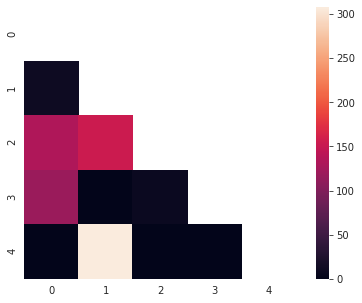

In [39]:
mask = np.zeros_like(CONF_MAT5)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))

    ax = sns.heatmap(CONF_MAT5, mask=mask, square=True)

Evaluation: outputs answer most questions, over &and underfitting couldn't be detected as serious problems on highest performing models.

 MOD5 had highest f1 score:  f1 Score = 0.7908849449049175
